In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import glacierml as gl
import matplotlib.pyplot as plt
import tensorflow as tf


        
# RGI.to_csv('Farinotti_mean_thickness_RGI_ID.csv')


In [4]:
pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/'
RGI_extra = pd.DataFrame(columns = ['Farinotti Mean Thickness'])
for file in tqdm(os.listdir(pth_2)):
    file_reader = pd.read_csv(pth_2 + file, encoding_errors = 'replace', on_bad_lines = 'skip')
    RGI_extra = pd.concat([RGI_extra, file_reader], ignore_index = True)

    # select only RGI data that was used to train the model   
RGI = RGI_extra[[
'RGIId',
    'Farinotti Mean Thickness'
]]
print(RGI)

100%|██████████| 19/19 [00:01<00:00, 18.40it/s]

                 RGIId Farinotti Mean Thickness
0       RGI60-16.00001                      NaN
1       RGI60-16.00002                      NaN
2       RGI60-16.00003                      NaN
3       RGI60-16.00004                      NaN
4       RGI60-16.00005                      NaN
...                ...                      ...
216496  RGI60-08.03413                      NaN
216497  RGI60-08.03414                      NaN
216498  RGI60-08.03415                      NaN
216499  RGI60-08.03416                      NaN
216500  RGI60-08.03417                      NaN

[216501 rows x 2 columns]


In [11]:

# print(RGI['RGIId'])

pth_1 = '/home/simonhans/data/prethicktor/RGI/outlines/'
# rootdir = '~'
for region_number in range(1,20,1):
            
    if len(str(region_number)) == 1:
        N = 1
        region_number = str(region_number).zfill(N + len(str(region_number)))
    else:
        str(region_number) == str(region_number)
        
    region_folder = pth_1 + 'RGI60-' + str(region_number) + '/'
    for file in tqdm(os.listdir(region_folder)):
        im = Image.open(region_folder + file)
        imarray = np.array(im)
        df = pd.DataFrame(imarray)
        df = df.replace(0.0, np.nan)
        print(df)
        mean_glacier_thickness = df.mean().mean()
        print(mean_glacier_thickness)
        RGI['Farinotti Mean Thickness'].loc[RGI['RGIId'] == file[:14]] = mean_glacier_thickness
        break
    break

  0%|          | 0/27108 [00:00<?, ?it/s]

    0   1          2          3          4          5          6          7   \
0  NaN NaN        NaN        NaN        NaN        NaN        NaN        NaN   
1  NaN NaN        NaN        NaN        NaN        NaN        NaN        NaN   
2  NaN NaN        NaN        NaN        NaN        NaN  14.316401  13.821914   
3  NaN NaN        NaN        NaN        NaN        NaN  16.010609  15.228675   
4  NaN NaN        NaN        NaN        NaN        NaN  15.633120  16.797022   
5  NaN NaN        NaN        NaN        NaN  11.777027  15.932815  17.360212   
6  NaN NaN        NaN  12.458170  12.897107  14.907828  15.976786  17.459949   
7  NaN NaN  10.035542  12.741078  13.709492  14.812737  15.647024  16.570595   
8  NaN NaN  10.536461  12.404362  13.022881  13.659633  14.023642  15.048671   
9  NaN NaN        NaN  11.065404  12.308345  11.181601  12.174986  12.568321   
10 NaN NaN        NaN        NaN        NaN        NaN        NaN        NaN   
11 NaN NaN        NaN        NaN        

In [2]:
RGI = gl.RGI_loader(
    pth = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/'
)

In [3]:
RGI

,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax
0,-16.5212,-69.9053,21.4,4896,4966,5041,0.098,181,348
1,-16.5196,-69.9117,20.7,4963,5005,5056,0.147,169,289
2,-16.5156,-69.9246,25.4,4892,4963,5043,0.149,176,337
3,-16.3855,-69.1445,15.4,4443,4491,4521,0.051,185,320
4,-16.3840,-69.1411,20.7,4397,4453,4522,0.037,144,347
...,...,...,...,...,...,...,...,...,...
216496,68.1640,16.6040,38.6,887,980,1182,0.098,54,293
216497,66.5900,15.2130,17.6,1181,1377,1452,0.389,37,507
216498,66.7290,15.2030,10.7,1289,1314,1330,0.056,242,177
216499,66.0060,14.2960,7.7,890,1581,1811,14.152,316,6221


In [6]:
df = pd.read_csv('RGI_w_Farinotti_Thicknesses.csv')
df = df.drop('Unnamed: 0', axis = 1)
df

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness
0,RGI60-16.00001,-16.5212,-69.9053,21.4,4896,4966,5041,0.098,181,348,5.876803
1,RGI60-16.00002,-16.5196,-69.9117,20.7,4963,5005,5056,0.147,169,289,6.312049
2,RGI60-16.00003,-16.5156,-69.9246,25.4,4892,4963,5043,0.149,176,337,4.670869
3,RGI60-16.00004,-16.3855,-69.1445,15.4,4443,4491,4521,0.051,185,320,4.174004
4,RGI60-16.00005,-16.3840,-69.1411,20.7,4397,4453,4522,0.037,144,347,2.352954
...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-08.03413,68.1640,16.6040,38.6,887,980,1182,0.098,54,293,4.424167
216497,RGI60-08.03414,66.5900,15.2130,17.6,1181,1377,1452,0.389,37,507,7.954485
216498,RGI60-08.03415,66.7290,15.2030,10.7,1289,1314,1330,0.056,242,177,6.311195
216499,RGI60-08.03416,66.0060,14.2960,7.7,890,1581,1811,14.152,316,6221,60.667000


0it [00:00, ?it/s]


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

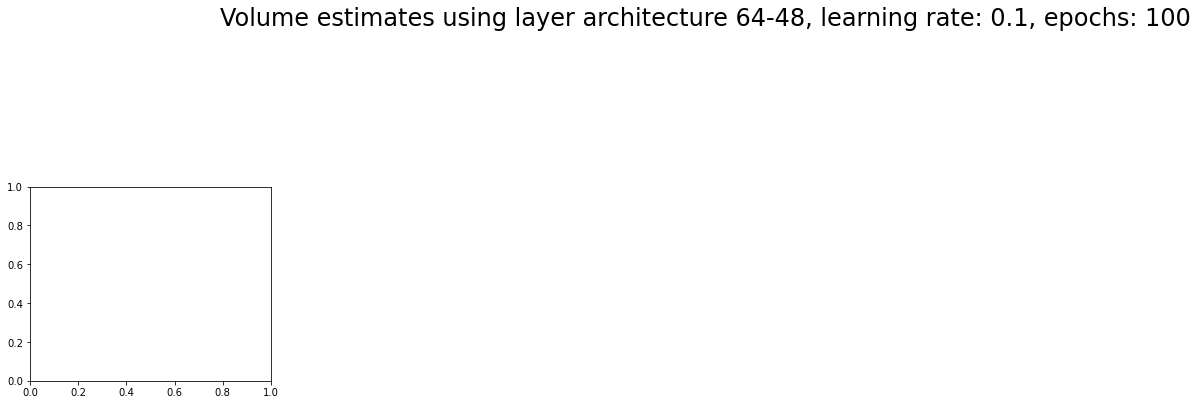

In [10]:
arch = '64-48'
top_learning_rate = 0.1
epochs = 100
dropout = 1

fig = plt.figure(figsize=(25, 25))
plt.subplots_adjust(hspace=0.5)
plt.suptitle(
    'Volume estimates using layer architecture ' + str(arch) +
    ', learning rate: ' + str(top_learning_rate) + ', epochs: ' + str(epochs)
             , fontsize=24, y=0.98
            )
fig.patch.set_facecolor('w')



df7 = gl.data_loader(
root_dir = '/home/simonhans/data/prethicktor/'
)
module = 'sm7'
res = 'sr7'
dataset = df7 
dataset.name = 'df7'
rootdir = 'saved_models/' + module + '/sm_' + str(arch) + '/'

dnn_model = {}
RS = range(0,25,1)
for n, rs in tqdm(enumerate(RS)):
    ax = plt.subplot(5, 5, n + 1)
    model_name = (
        str(arch) + 
        '_' + 
        dataset.name +
        '_' + 
        str(dropout) +
        '_dnn_MULTI_' + 
        str(top_learning_rate) + 
        '_0.2_' +
        str(epochs) + 
        '_' + 
        str(rs)
    )   
    
    model_path = (
        rootdir + 
        dataset.name +
        '_' + 
        str(dropout) +
        '_dnn_MULTI_' + 
        str(top_learning_rate) + 
        '_0.2_' +
        str(epochs) + 
        '_' + 
        str(rs)
    )
    
    
    
    dnn_model[model_name] = tf.keras.models.load_model(model_path)
    
    
    y = dnn_model[model_name].predict(RGI, verbose = 0)
    
    plt.plot(df['Farinotti Mean Thickness'],y,'.')
    plt.plot((0,400),(0,400),'-')
    plt.xlabel('Farinotti Thickness (m)')
    plt.ylabel('Edasi Thickness (m)')
    ax.set_title('Random State ' +str(rs))
    plt.xlim((0,400))
    plt.ylim((0,400))
# plt.savefig('/home/simonhans/Desktop/test_fig.png')

In [21]:
df['Farinotti Mean Thickness'].max()

351.5749816894531

In [22]:
y.max()

3276.9016